# Identification
Please indicate your name

Student 1: Andrea Cosentino

Student 2: Andrei Aralov

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modeled as follows:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodization of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if the 2D Shannon condition is verified (band-limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so-called Shannon interpolation.
 
## Exercise 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>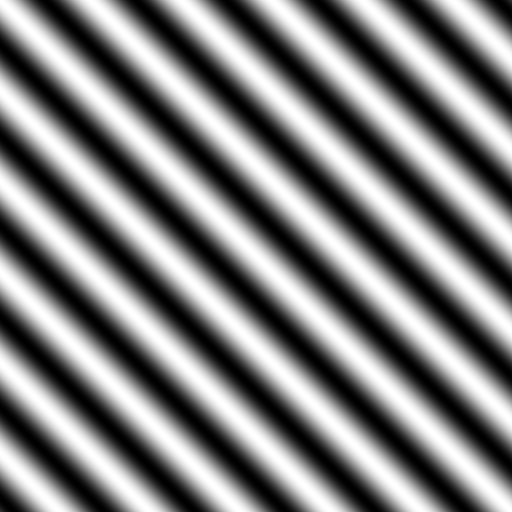</div>
The goal of this exercise is to study the limit conditions of sampling this image in order to avoid aliasing.

In [103]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T,np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    # ax = fig.gca(projection='3d')
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    
get_ipython().magic('matplotlib inline')
    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows sampling signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Parameters `A`, `theta`, `L`, and `T0` respectively control the amplitude, orientation, and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


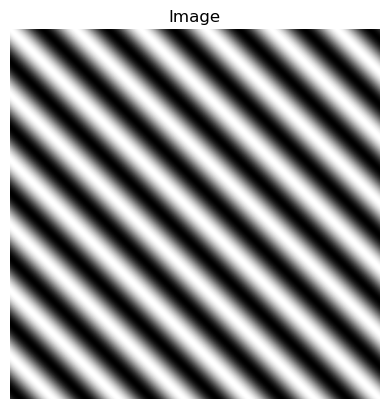

max in u direction is 0.011048543456039806
max in t direction is 0.011048543456039806


In [234]:
sin = sinusoid2d(1,45,512,64,1);
plt.imshow(sin,cmap='gray')
plt.axis('off')
plt.title('Image')
plt.show()
np.shape(sin)
f = 1/64
import math
# f_0 * sin(theta)
fuMax = f*math.sin(math.pi/4)
# f_0 * cos(theta)
ftMax = f*math.cos(math.pi/4)
print(f'max in u direction is {fuMax}')
print(f'max in t direction is {ftMax}')

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

In [80]:
# The maximal frequency in direction t is 1/T * cos(phi) = 0.1104 (circa) and
# in direction u is 1/T*sin(phi) = 0.01104 (circa). 
# We can use the Shannon-nyquist theorem to derive the limit frequency (?)
# The limit frequency is 2*fmax

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

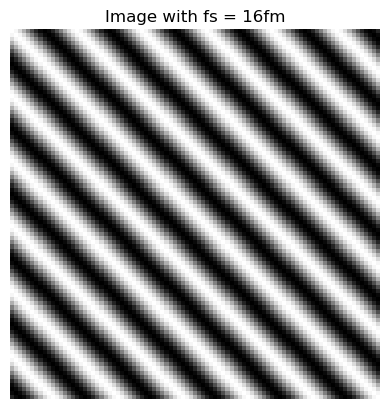

In [237]:
t = 1/(fuMax*16)
sin16 = sinusoid2d(1,45,512,64,t);
plt.imshow(sin16,cmap = 'gray')
plt.axis('off')
plt.title('Image with fs = 16fm')
plt.show()

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

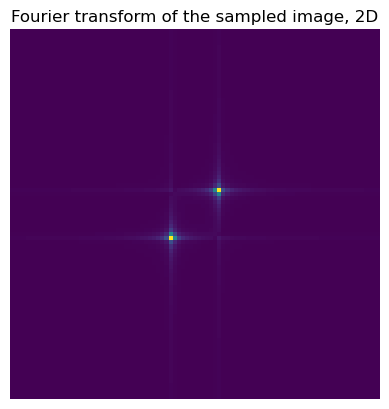

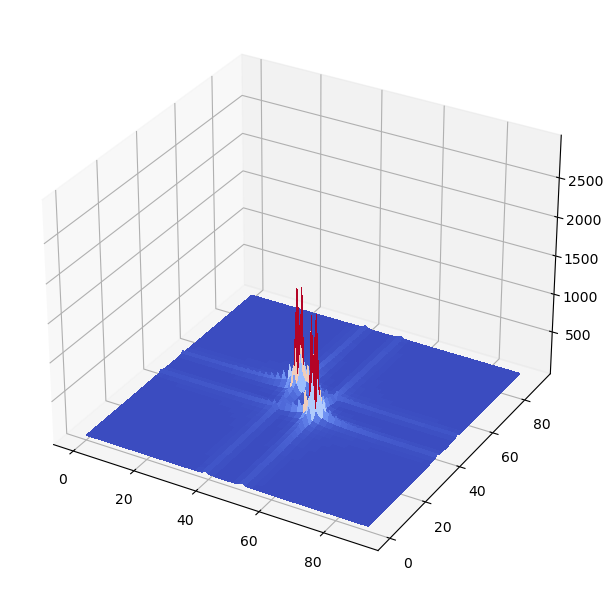

In [241]:
fourier = fft2(sin16)


def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))
fourier = toVisualizeFT(fourier)
plt.imshow(fourier)
plt.axis('off')
plt.title('Fourier transform of the sampled image, 2D')
surf(fourier)
plt.show()

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of these differences?
    - Why, aside from the two Dirac peaks, there are some structures? Explain the origin of these lobes.
    - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfere.

In [1]:
# - Verified
# - The higher the frequency, the closer we get to the continuous case, which is two infinite peaks
# - Because of the sampling is the limit case,
# T0 = 1/fm given by the Shannon theorem If we take exactly the limit we have 1 peak,
# if we go over we are oversampling and we have 2 peaks.

###############################################
#      NOT SURE ABOUT THE THIRD ANSWER        #
###############################################

t = 1/(fuMax*2.2)
sin4 = sinusoid2d(1,45,512,64,t)
surf(toVisualizeFT(fft2(sin4)))
plt.show()


t = 1/(fuMax*2)
sin4 = sinusoid2d(1,45,512,64,t)
surf(toVisualizeFT(fft2(sin4)))
plt.show()


t = 1/(fuMax*3)
sin4 = sinusoid2d(1,45,512,64,t)
surf(toVisualizeFT(fft2(sin4)))
plt.show()


t = 1/(fuMax*400)
sin4 = sinusoid2d(1,45,512,64,t)
surf(toVisualizeFT(fft2(sin4)))
plt.show()

NameError: name 'fuMax' is not defined

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

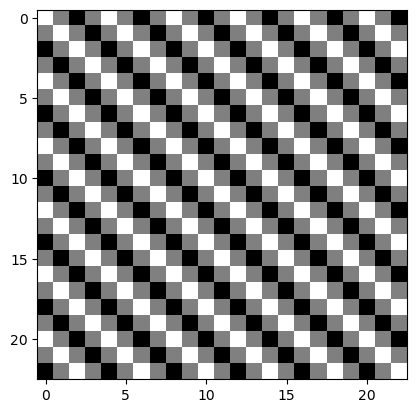

22.62741699796952


In [183]:
t = 1/(fuMax*4)
size = 512
sin4 = sinusoid2d(1,45,size,64,t)

plt.imshow(sin4,cmap='gray')
plt.show()
print(t)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [181]:
def error(xr,xd,A,L):
    '''Array*Array*double*double -> double'''
    c = 1/(2*A*L*L)
    res = 0
    for i in range(L):
        for j in range(L):
            res += abs(xr[i][j]-xd[i][j])
    return c*res

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal. Print the relative average error between the original and reconstructed images. What is the origin of this error?

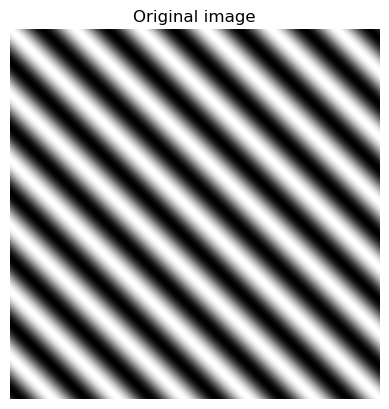

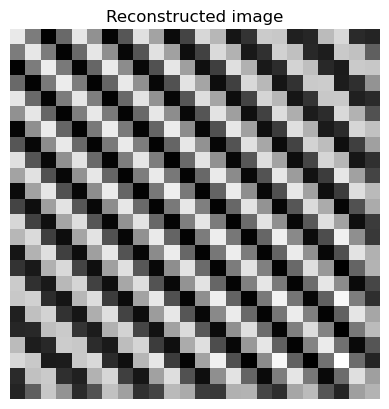

The average error is 0.4436558220586947


In [259]:
def subsample(image,factor):
    return image[::factor,::factor]

t = 1/(fuMax*4)
size = 512
original = sinusoid2d(1,45,size,64,1)
sin4 = sinusoid2d(1,45,size,64,t)
rec = shannonInterpolation(sin4,t,size)
rec = subsample(rec,int(t))
plt.imshow(original,cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

plt.imshow(rec,cmap='gray')
plt.title('Reconstructed image')
plt.axis('off')
plt.show()

print(f'The average error is {error(original,rec,1,sin4.shape[0])}')
# The origin of the error is due to aliasing

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

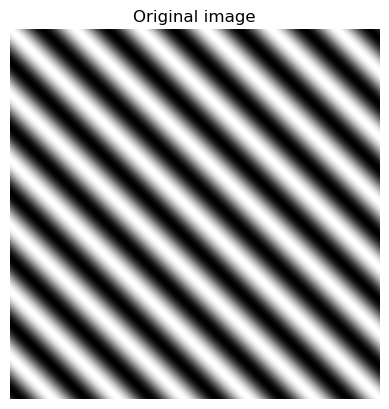

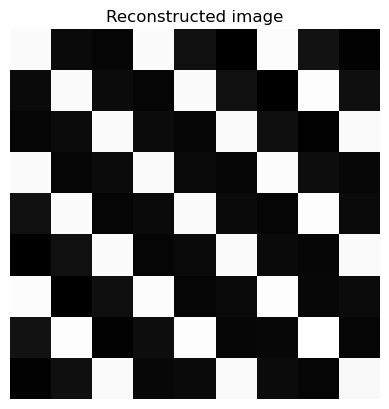

The average error is 0.49453025008031737


In [261]:
t = 1/(fuMax*3/2)
sin4 = sinusoid2d(1,45,size,64,t)
original = sinusoid2d(1,45,size,64,1)
plt.imshow(original,cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()
rec = shannonInterpolation(sin4,t,size)
rec = subsample(rec,int(t))
plt.imshow(rec,cmap='gray')
plt.title('Reconstructed image')
plt.axis('off')
plt.show()
print(f'The average error is {error(original,rec,1,sin4.shape[0])}')
# Aliasing makes images more "blurry", less defined. It erodes details given by the high frequencies.

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

 The maximum frequency is 0.011048543456039806


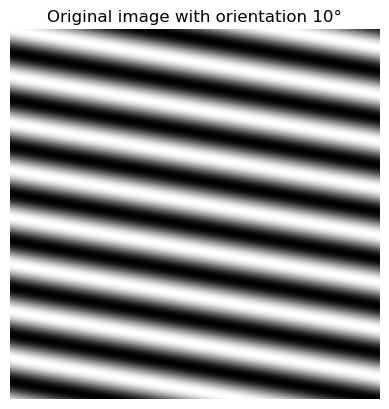

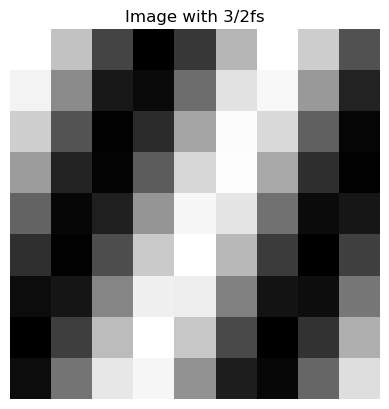

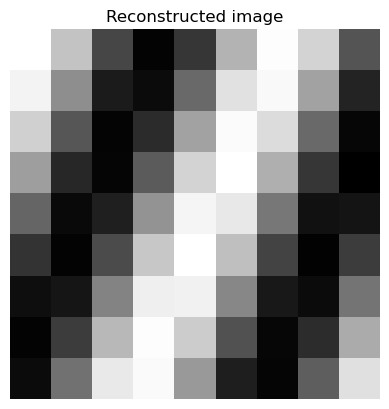

In [262]:
sin4 = sinusoid2d(1,10,512,64,1)

# f_0 * sin(theta)
fuMax = f*math.sin(math.pi/4)
# f_0 * cos(theta)
ftMax = f*math.cos(math.pi/4)
print(f' The maximum frequency is {max(fuMax,ftMax)}')

plt.imshow(sin4,cmap='gray')
plt.axis('off')
plt.title('Original image with orientation 10°')
plt.show()

t = 1/(3/2*fuMax)
sin4 = sinusoid2d(1,10,512,64,t)
plt.imshow(sin4,cmap='gray')
plt.title('Image with 3/2fs')
plt.axis('off')
plt.show()

rec = shannonInterpolation(sin4,t,512)
rec = subsample(rec,int(t))
plt.imshow(rec,cmap = 'gray')
plt.axis('off')
plt.title('Reconstructed image')
plt.show()
# It changes the orientation of the image.

6. Write a function `shannonInterpolationLoop()` implementing equation (1) using four nested loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [276]:
# TO DO

In [1]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below



## Exercise 2: aliasing on natural images

In this exercise, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

In [253]:
# Subsample of factor 2 is reducing the number of samples in an image by half in each dimension. 

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effe
   cts of aliasing. Why aliasing is a drawback ?

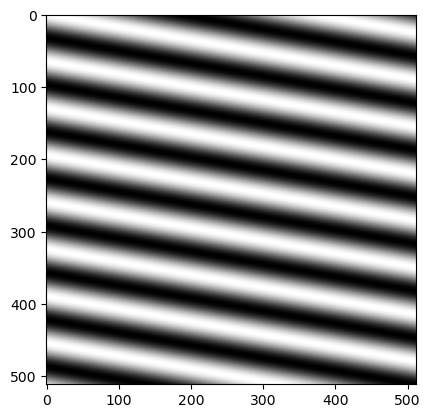

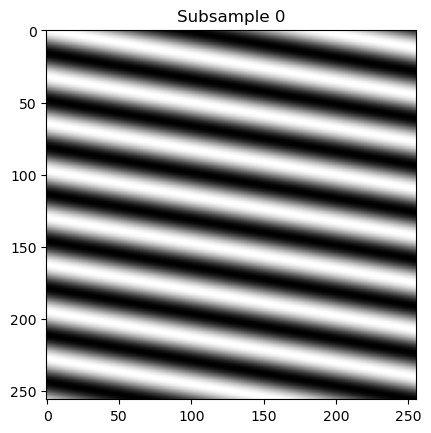

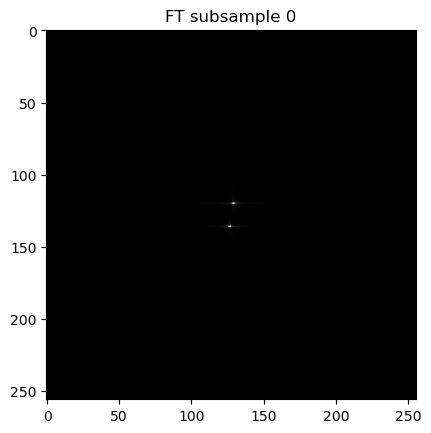

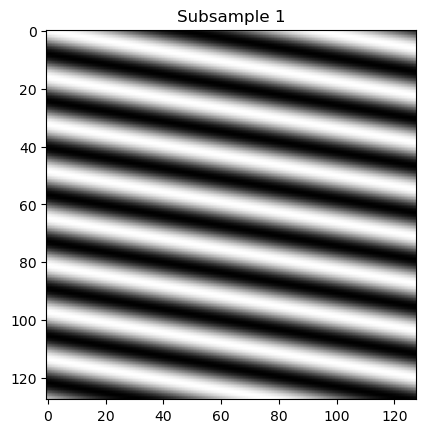

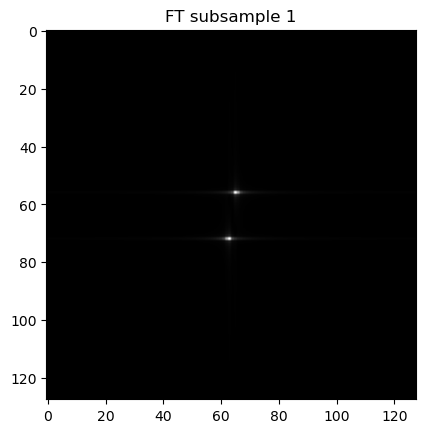

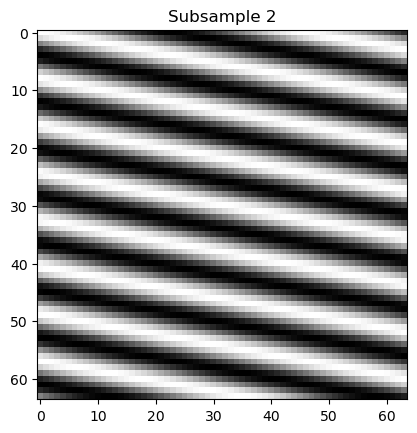

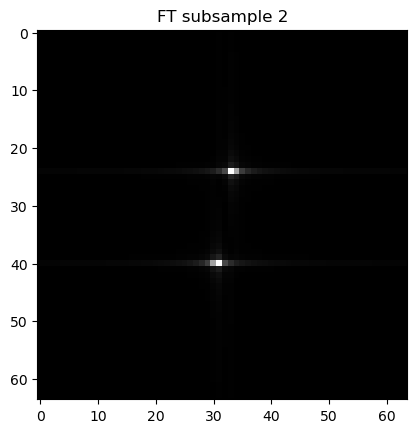

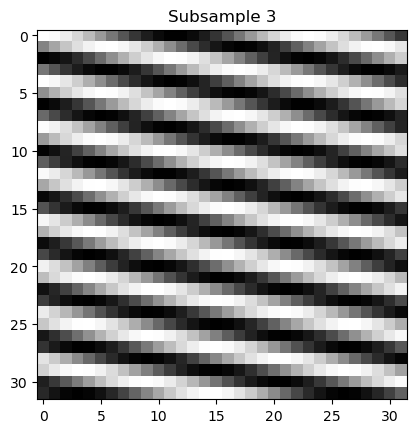

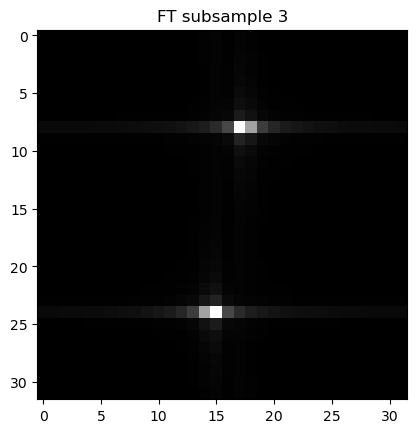

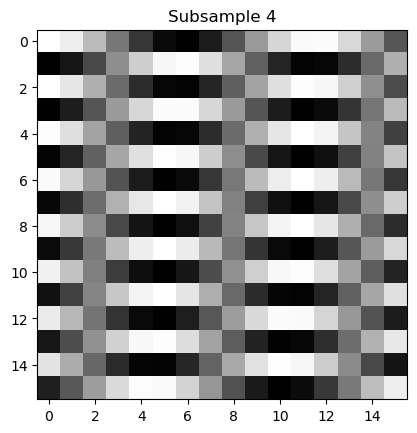

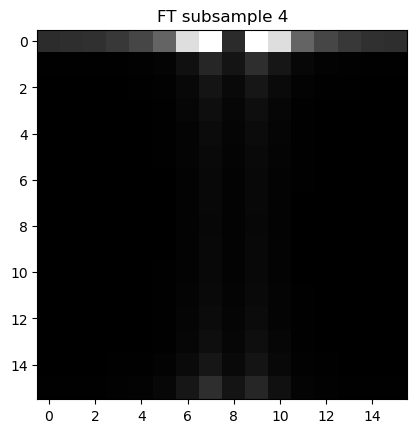

In [274]:
def iterateSubsampling(image,factor,n):
    for i in range(n):
        image = subsample(image,factor)
        plt.imshow(image,cmap='gray')
        plt.title(f'Subsample {i}')
        plt.show()
        fourier = fft2(image)
        ft = toVisualizeFT(fourier)
        plt.imshow(ft,cmap= 'gray')
        plt.title(f'FT subsample {i}')
        plt.show()
# We can see that at every iteration we have a worse quality, different part of the images merge together
# and become indistinguishable from each other (aliasing).

sin4 = sinusoid2d(1,10,512,64,1)
plt.imshow(sin4,cmap='gray')
plt.show()
iterateSubsampling(sin4,2,5)

3. Same question with the image `img/mandrill.png`.

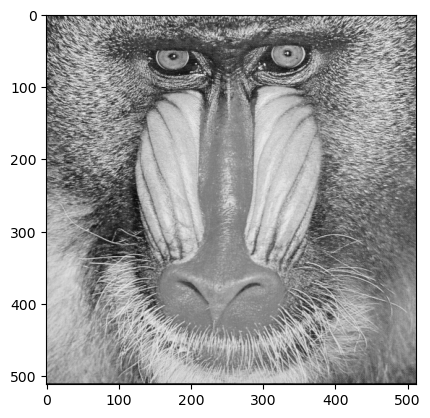

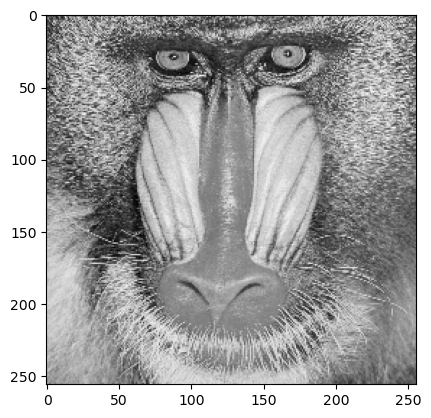

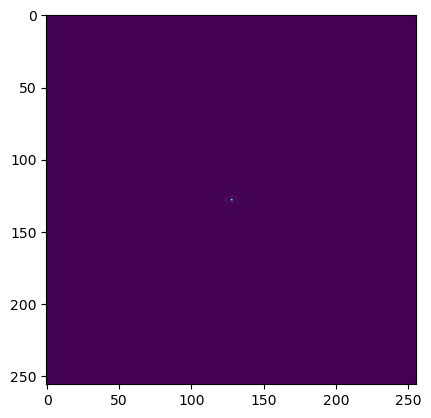

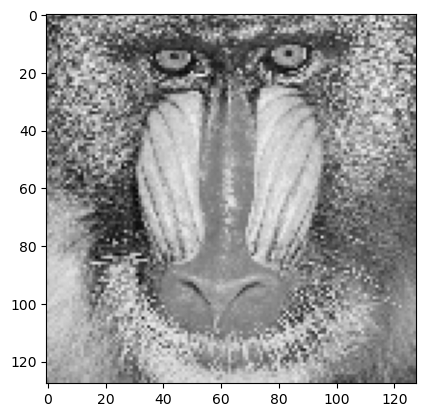

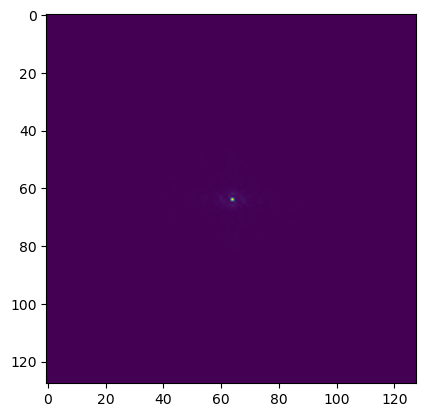

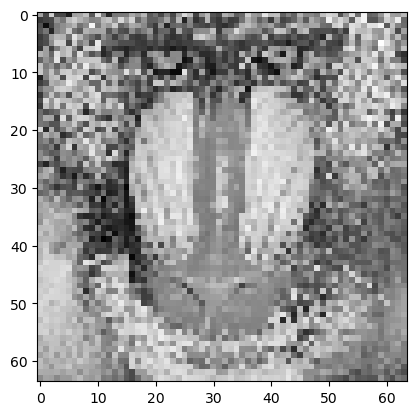

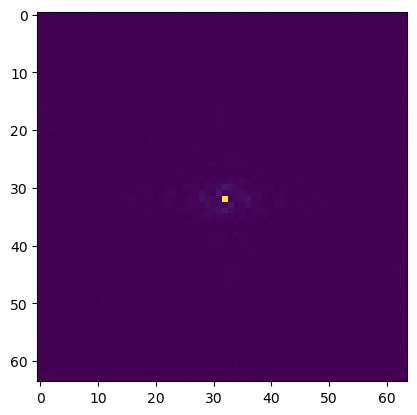

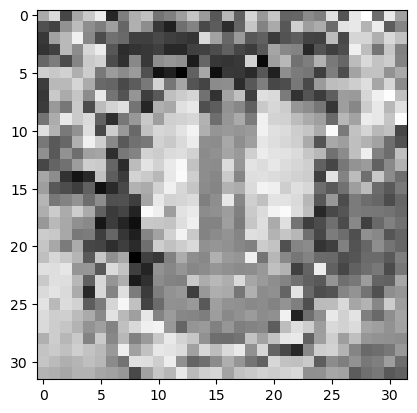

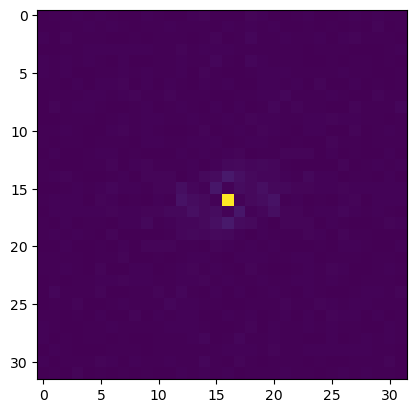

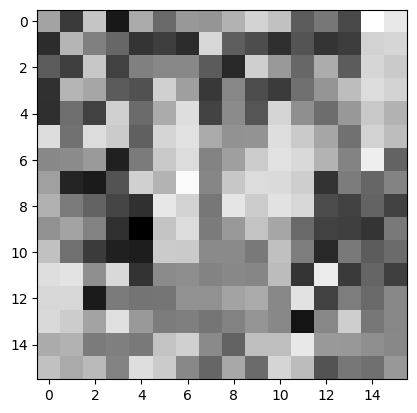

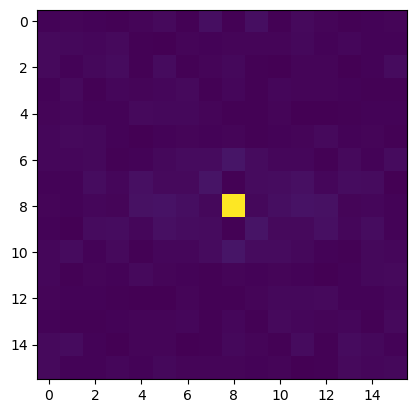

In [43]:
from PIL import Image
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below
plt.imshow(mandrill,cmap='gray')
plt.show()

iterateSubsampling(mandrill,2,5)